## Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from MassProfile import MassProfile

In [3]:
r = np.arange(0.25, 30.5, 1.5); print(r)

[ 0.25  1.75  3.25  4.75  6.25  7.75  9.25 10.75 12.25 13.75 15.25 16.75
 18.25 19.75 21.25 22.75 24.25 25.75 27.25 28.75 30.25]


In [4]:
MW = MassProfile("MW", 0)

In [5]:
MW.MassEnclosed(1, r).value

array([0.00000000e+00, 9.08465500e+08, 4.06834550e+09, 9.16365200e+09,
       1.58783970e+10, 2.38570940e+10, 3.13618090e+10, 4.09599445e+10,
       5.35994645e+10, 6.39875700e+10, 7.53236395e+10, 8.76076730e+10,
       1.01392650e+11, 1.16244085e+11, 1.30424047e+11, 1.44801501e+11,
       1.58981462e+11, 1.73319418e+11, 1.86156431e+11, 1.99664918e+11,
       2.13133906e+11])

## Plotting Rotation Curves

In [13]:
def plot_mass(ax, MP, r, halo_mass, a, gal_name):
    # plotting the enclosed mass of each component
    ax.semilogy(r, MP.MassEnclosed(1, r), color = "blue", label = "Halo")
    ax.semilogy(r, MP.MassEnclosed(2, r), color = "orange", label = "Disk")
    ax.semilogy(r, MP.MassEnclosed(3, r), color = "green", label = "Bulge")

    # plotting the total enclosed mass
    ax.semilogy(r, MP.MassEnclosedTotal(r), color = "red", label = "Total enclosed mass")

    # plotting the hernquist profile mass profile
    ax.semilogy(r, MP.HernquistMass(r, a, halo_mass), color = "purple", ls = "--", label = f"Hernquist")

    ax.set_xlabel("Radius (kpc)")
    ax.set_ylabel("Enclosed Mass ($M_{\odot}$)")

    ax.text(0.05, 0.95, f"{gal_name}", transform=ax.transAxes, fontsize=12, verticalalignment='top')
    return ax

def plot_total_rotation_curve(ax, MP, r, halo_mass, a, gal_name):
    # plotting the circular velocity of each component
    ax.plot(r, MP.CircularVelocity(1, r), color = "blue", label = "Halo")
    ax.plot(r, MP.CircularVelocity(2, r), color = "orange", label = "Disk")

    if not gal_name == "M33":
        ax.plot(r, MP.CircularVelocity(3, r), color = "green", label = "Bulge")

    # plotting the total circular velocity
    ax.plot(r, MP.CircularVelocityTotal(r), color = "red", label = "Total enclosed mass")

    # plotting the hernquist circular velocity profile
    ax.plot(r, MP.HernquistVCirc(r, a, halo_mass), color = "purple", ls = "--", label = f"Hernquist")

    ax.set_xlabel("Radius (kpc)")
    ax.set_ylabel("Circular Velocity (km/s)")

    ax.text(0.05, 0.95, f"{gal_name}", transform=ax.transAxes, fontsize=12, verticalalignment='top')
    return ax

In [7]:
# range of radii
r = np.arange(0.1, 30.1, 0.1)

# rotation curve - MW (r 30kpc)
MW = MassProfile("MW", 0)
MW_halo = 1.975 # 10^12 Msun
a = 55

# rotation curve - M31
M31 = MassProfile("M31", 0)
M_halo = 1.921 # 10^12 Msun
a = 60

# rotation curve - M33
M33 = MassProfile("M33", 0)
M_halo = 0.187 # 10^12 Msun
a = 23.5

/var/folders/1g/jdg8wj2j06g8cm00gnn6zvzc0000gn/T/ipykernel_16674/1825333917.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


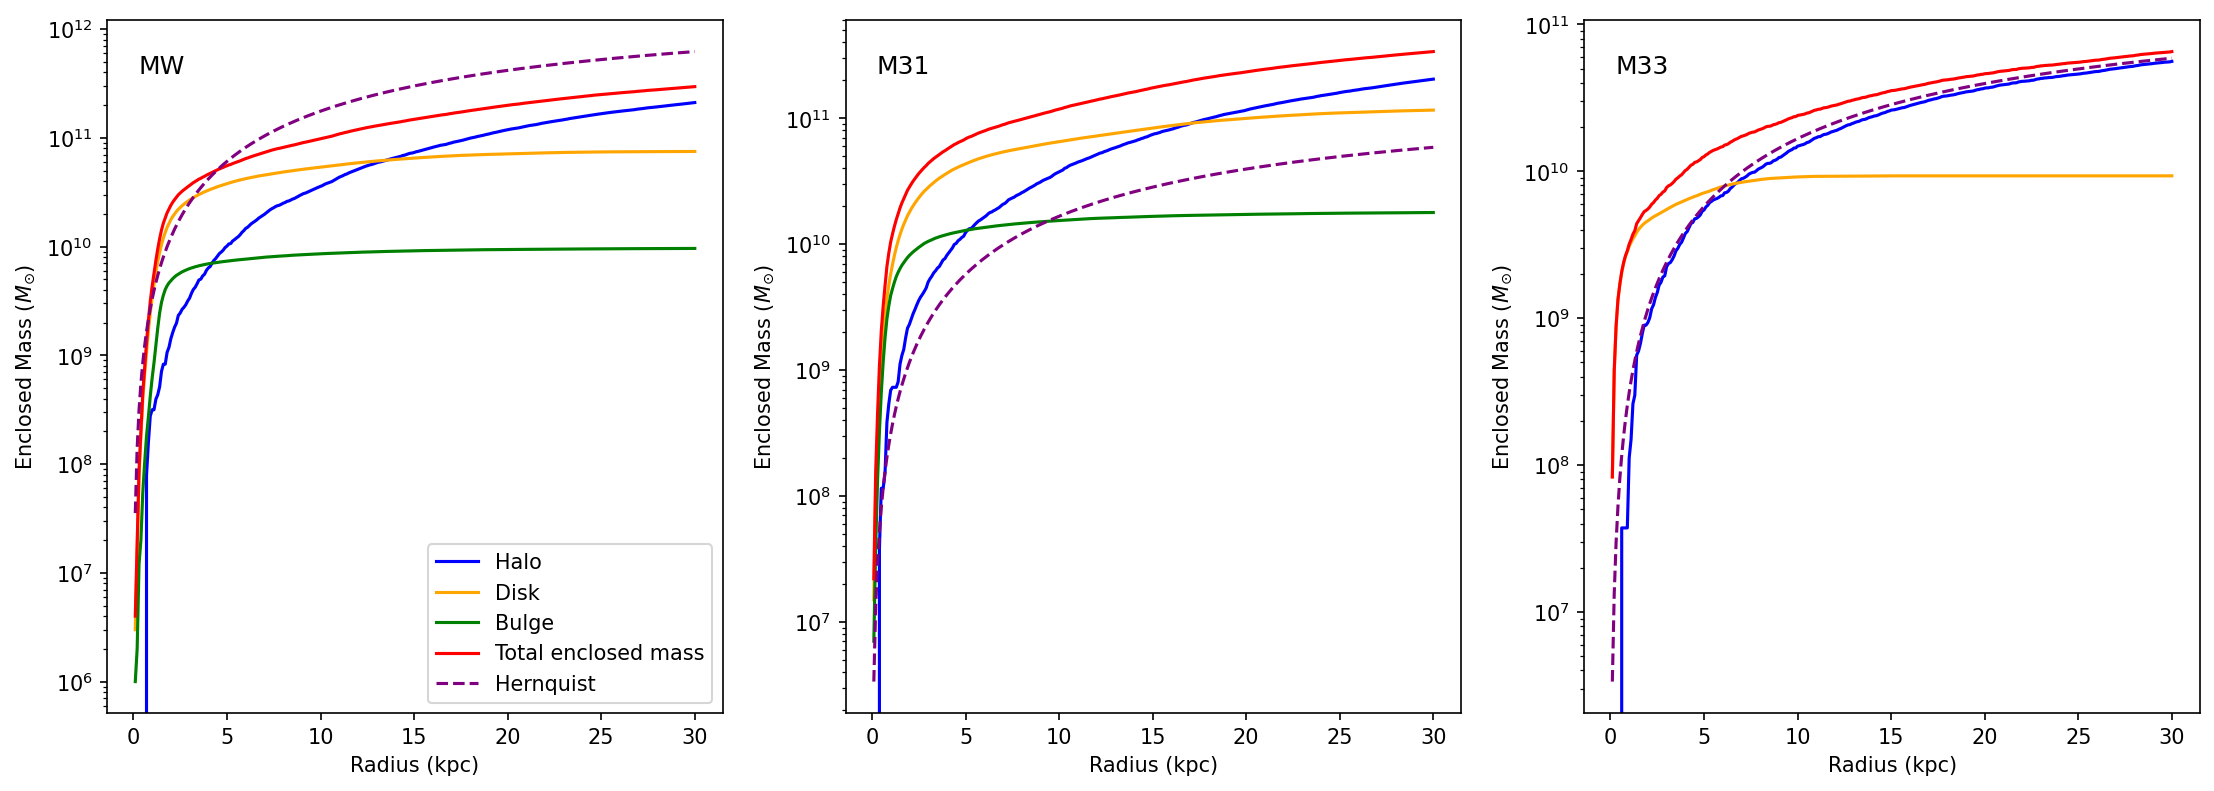

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6), dpi=150)
ax = ax.flatten()

ax[0] = plot_mass(ax[0], MW, r, MW_halo, a, "MW")
ax[1] = plot_mass(ax[1], M31, r, M_halo, a, "M31")
ax[2] = plot_mass(ax[2], M33, r, M_halo, a, "M33")
ax[0].legend()

# save figure
fig.savefig("mass_profile.png", dpi=300)

fig.show()

/var/folders/1g/jdg8wj2j06g8cm00gnn6zvzc0000gn/T/ipykernel_16674/1103291244.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


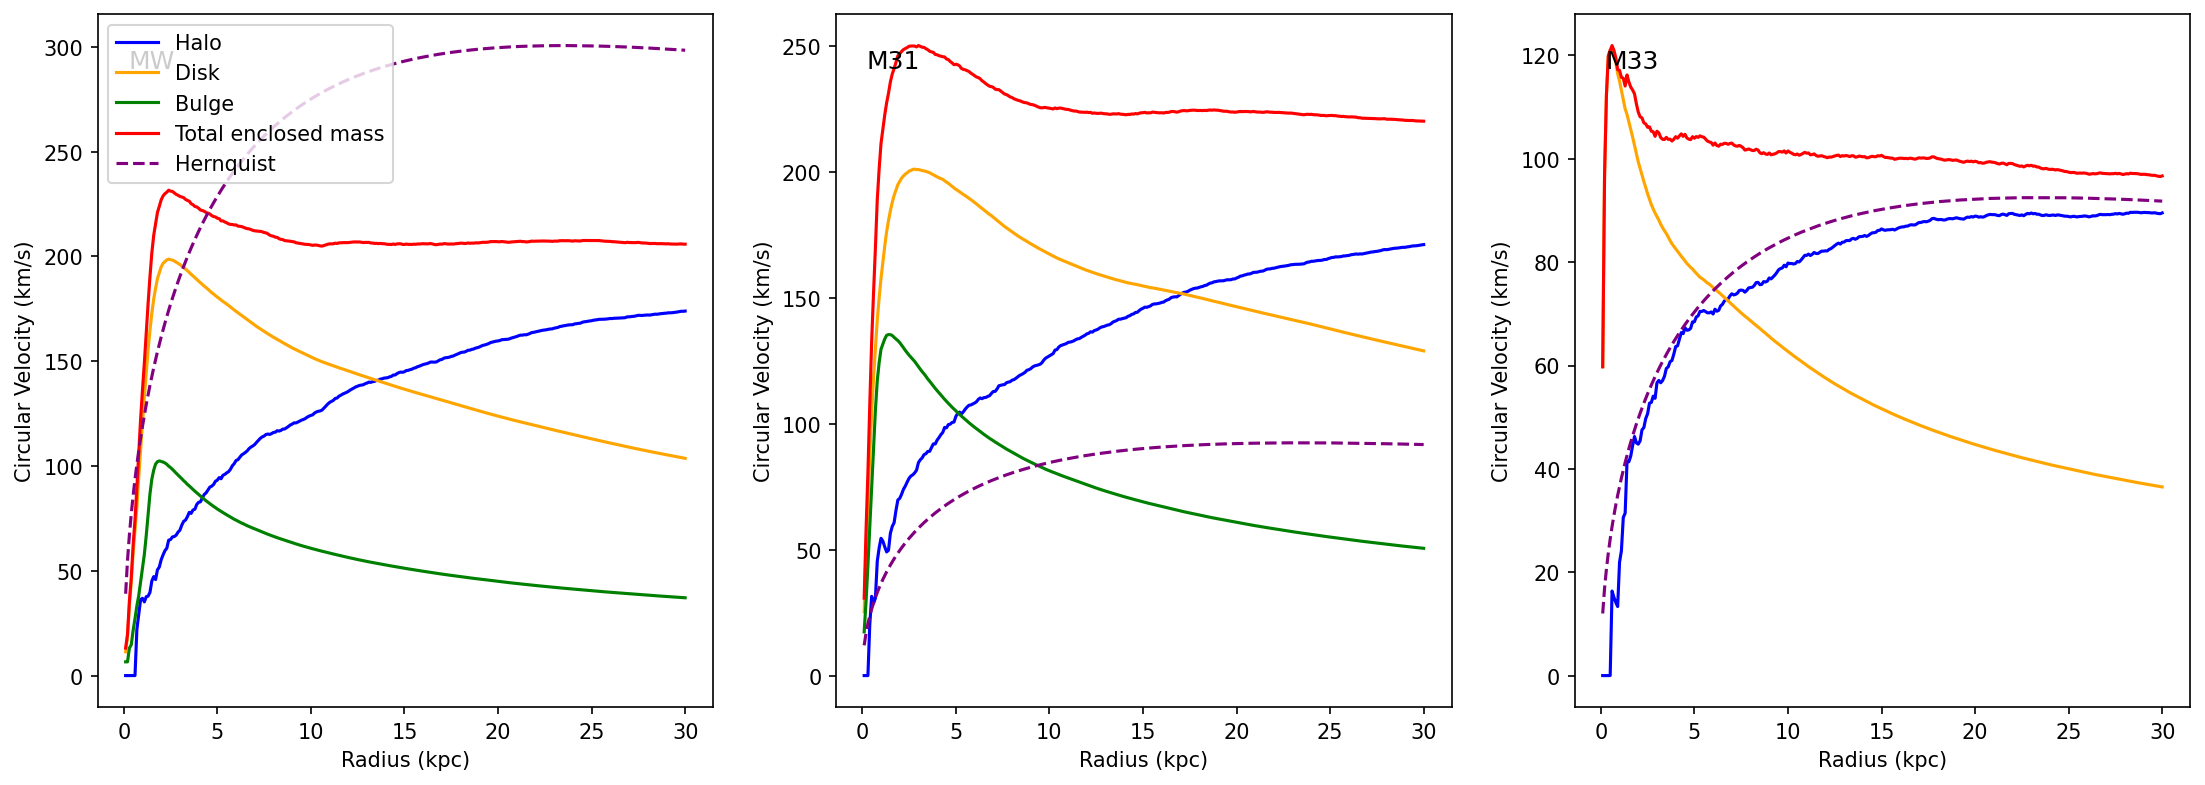

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6), dpi=150)
ax = ax.flatten()

ax[0] = plot_total_rotation_curve(ax[0], MW, r, MW_halo, a, "MW")
ax[1] = plot_total_rotation_curve(ax[1], M31, r, M_halo, a, "M31")
ax[2] = plot_total_rotation_curve(ax[2], M33, r, M_halo, a, "M33")
ax[0].legend()

# save figure
fig.savefig("rotation_curve.png", dpi=300)

fig.show()